# **Proyecto Corte 2 - Sistemas Inteligentes**
# **Grupo:** Brainiac

In [9]:
import random
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import math

# Función para calcular la distancia entre dos ciudades usando la fórmula de Haversine
def calcular_distancia_haversine(coord1, coord2):
    """
    Calcula la distancia entre dos puntos en la Tierra usando la fórmula de Haversine.

    Args:
      coord1: Una tupla que representa las coordenadas (latitud, longitud) del primer punto.
      coord2: Una tupla que representa las coordenadas (latitud, longitud) del segundo punto.

    Returns:
      La distancia entre los dos puntos en kilómetros.
    """
    # Radio de la Tierra en kilómetros
    R = 6371.0

    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance

# Función para calcular la distancia entre dos ciudades
def calcular_distancia(coord1, coord2):
    """
    Calcula la distancia entre dos puntos utilizando la librería geopy.

    Args:
      coord1: Una tupla que representa las coordenadas (latitud, longitud) del primer punto.
      coord2: Una tupla que representa las coordenadas (latitud, longitud) del segundo punto.

    Returns:
      La distancia entre los dos puntos en kilómetros.
    """
    return geodesic(coord1, coord2).km

# Función para calcular la intensidad de la luz de una luciérnaga
def calcular_intensidad(ruta, distancias):
    """
    Calcula la intensidad de la luz de una luciérnaga en función de la distancia total de su ruta.

    Args:
      ruta: Una lista que representa la ruta de la luciérnaga.
      distancias: Una matriz de distancias entre ciudades.

    Returns:
      La intensidad de la luz de la luciérnaga.
    """
    distancia_total = 0
    for i in range(len(ruta) - 1):
        distancia_total += distancias[ruta[i]][ruta[i + 1]]
    distancia_total += distancias[ruta[-1]][ruta[0]]  # Volver a la ciudad de origen
    return 1 / (distancia_total + 1e-10)  # Intensidad inversamente proporcional a la distancia + pequeño valor para evitar división por cero

# Función para actualizar la posición de una luciérnaga
def actualizar_posicion(ruta1, ruta2, distancias, factor_atraccion):
    """
    Actualiza la posición de una luciérnaga en función de la intensidad de la luz de otra luciérnaga.

    Args:
      ruta1: La ruta de la luciérnaga que se va a actualizar.
      ruta2: La ruta de la luciérnaga con mayor intensidad de luz.
      distancias: Una matriz de distancias entre ciudades.
      factor_atraccion: El factor de atracción entre luciérnagas.

    Returns:
      La nueva ruta de la luciérnaga.
    """
    nueva_ruta = ruta1.copy()
    for i in range(1, len(ruta1) - 1):  # No cambiar la ciudad de origen
        if calcular_intensidad(ruta2, distancias) > calcular_intensidad(ruta1, distancias):
            ciudad1 = ciudades[ruta1[i]]  # Obtener el nombre de la ciudad
            ciudad2 = ciudades[ruta2[i]]  # Obtener el nombre de la ciudad
            distancia = calcular_distancia_haversine(ciudades_coordenadas[ciudad1], ciudades_coordenadas[ciudad2])
            if distancia < 1e-10:  # Evitar división por cero
                distancia = 1e-10
            if random.random() < factor_atraccion / distancia:
                nueva_ruta[i], nueva_ruta[i + 1] = nueva_ruta[i + 1], nueva_ruta[i]  # Intercambiar dos ciudades
    return nueva_ruta

# Ciudades colombianas
ciudades = [
    "Bogotá", "Medellín", "Cali", "Barranquilla", "Cartagena", 
    "Bucaramanga", "Pereira", "Santa Marta", "Ibagué", "Manizales",
    "Cúcuta", "Popayán", "Neiva", "Armenia", "Tunja", 
    "Villavicencio", "Pasto", "Montería", "Sincelejo", "Riohacha",
    "Florencia", "Quibdó", "Leticia", "San Andrés", "Valledupar", 
    "Yopal", "Mocoa", "Arauca", "Inírida", "Mitú"
]


# Obtener coordenadas de las ciudades
geolocator = Nominatim(user_agent="my_app")
ciudades_coordenadas = {}
for ciudad in ciudades:
    ubicacion = geolocator.geocode(ciudad, timeout=100)
    ciudades_coordenadas[ciudad] = (ubicacion.latitude, ubicacion.longitude)

# Crear matriz de distancias
num_ciudades = len(ciudades)
distancias = [[0] * num_ciudades for _ in range(num_ciudades)]
for i in range(num_ciudades):
    for j in range(i + 1, num_ciudades):
        distancia = calcular_distancia(ciudades_coordenadas[ciudades[i]], ciudades_coordenadas[ciudades[j]])
        distancias[i][j] = distancias[j][i] = distancia

# Parámetros del algoritmo
num_luciernagas = 50
num_iteraciones = 100
factor_atraccion = 1

# Inicializar población de luciérnagas
luciernagas = []
for _ in range(num_luciernagas):
    ruta = random.sample(range(num_ciudades), num_ciudades)  # Ruta aleatoria
    luciernagas.append(ruta)

# Iterar y actualizar posiciones
for _ in range(num_iteraciones):
    for i in range(num_luciernagas):
        for j in range(num_luciernagas):
            if calcular_intensidad(luciernagas[j], distancias) > calcular_intensidad(luciernagas[i], distancias):
                luciernagas[i] = actualizar_posicion(luciernagas[i], luciernagas[j], distancias, factor_atraccion)

# Encontrar la mejor solución
mejor_ruta = max(luciernagas, key=lambda ruta: calcular_intensidad(ruta, distancias))
mejor_distancia = 1 / calcular_intensidad(mejor_ruta, distancias)

# Mostrar la mejor ruta
print("Mejor ruta:")
for i in mejor_ruta:
    print(ciudades[i])
print("Distancia total:", mejor_distancia)

# Obtener las dos mejores rutas
mejor_ruta = max(luciernagas, key=lambda ruta: calcular_intensidad(ruta, distancias))
segunda_mejor_ruta = sorted(luciernagas, key=lambda ruta: calcular_intensidad(ruta, distancias), reverse=True)[1]

# Convertir las rutas de índices a nombres de ciudades
mejor_ruta_nombres = [ciudades[i] for i in mejor_ruta]
segunda_mejor_ruta_nombres = [ciudades[i] for i in segunda_mejor_ruta]

print("Mejor ruta:", mejor_ruta_nombres)
print("Segunda mejor ruta:", segunda_mejor_ruta_nombres)


Mejor ruta:
Ibagué
Pereira
Cali
Mocoa
Quibdó
Yopal
Valledupar
Arauca
Mitú
Riohacha
Santa Marta
Sincelejo
Armenia
Florencia
Inírida
Leticia
Bogotá
Tunja
Barranquilla
Cartagena
Cúcuta
San Andrés
Manizales
Neiva
Popayán
Pasto
Medellín
Bucaramanga
Montería
Villavicencio
Distancia total: 29826.066353715047
Mejor ruta: ['Ibagué', 'Pereira', 'Cali', 'Mocoa', 'Quibdó', 'Yopal', 'Valledupar', 'Arauca', 'Mitú', 'Riohacha', 'Santa Marta', 'Sincelejo', 'Armenia', 'Florencia', 'Inírida', 'Leticia', 'Bogotá', 'Tunja', 'Barranquilla', 'Cartagena', 'Cúcuta', 'San Andrés', 'Manizales', 'Neiva', 'Popayán', 'Pasto', 'Medellín', 'Bucaramanga', 'Montería', 'Villavicencio']
Segunda mejor ruta: ['Neiva', 'Mitú', 'Inírida', 'Leticia', 'Mocoa', 'Florencia', 'Barranquilla', 'Santa Marta', 'Sincelejo', 'Pasto', 'Villavicencio', 'Bogotá', 'Cúcuta', 'Medellín', 'Quibdó', 'Popayán', 'Manizales', 'San Andrés', 'Tunja', 'Riohacha', 'Valledupar', 'Arauca', 'Cartagena', 'Ibagué', 'Cali', 'Armenia', 'Pereira', 'Yopal', 

Distancia total de la ruta 1: 14552.78 km
Distancia total de la ruta 2: 14278.76 km
La ruta 2 es más eficiente que la ruta 1.


C:\Users\juans\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\juans\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\juans\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


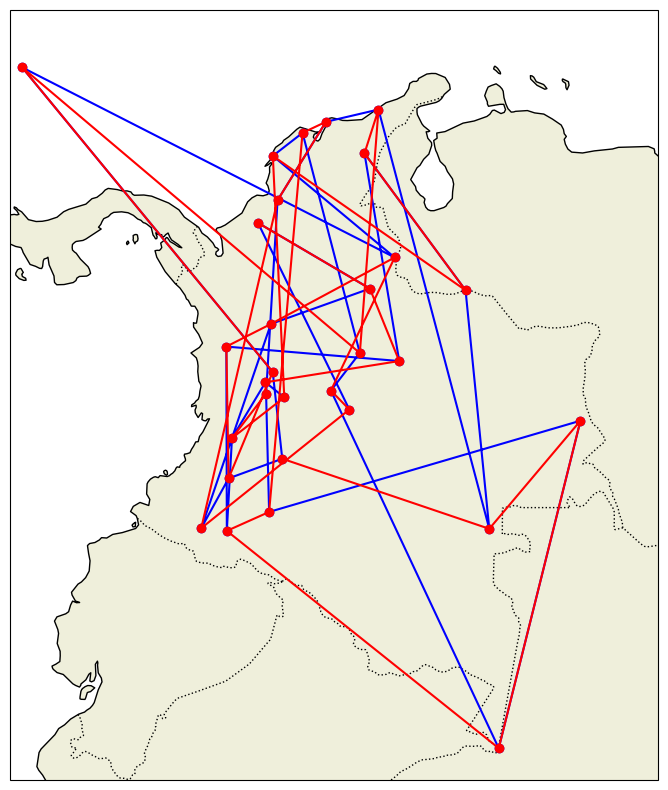

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math

# Función para calcular la distancia entre dos ciudades usando la fórmula de Haversine
def calcular_distancia_haversine(coord1, coord2):
    """Calcula la distancia entre dos puntos en la Tierra usando la fórmula de Haversine.

    Args:
        coord1: Tupla (latitud, longitud) del primer punto.
        coord2: Tupla (latitud, longitud) del segundo punto.

    Returns:
        float: Distancia entre los dos puntos en kilómetros.
    """
    # Radio de la Tierra en kilómetros
    R = 6371.0

    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance

# Datos de las rutas
ruta1 = mejor_ruta_nombres
ruta2 = segunda_mejor_ruta_nombres

# Ciudades colombianas y sus coordenadas
ciudades_coordenadas = {
    "Bogotá": (4.60971, -74.08175),
    "Medellín": (6.25184, -75.56359),
    "Cali": (3.43722, -76.5225),
    "Barranquilla": (10.96854, -74.78132),
    "Cartagena": (10.39972, -75.51444),
    "Bucaramanga": (7.12539, -73.1198),
    "Pereira": (4.81333, -75.69611),
    "Santa Marta": (11.24079, -74.20435),
    "Ibagué": (4.43889, -75.23222),
    "Manizales": (5.06889, -75.51738),
    "Cúcuta": (7.89391, -72.50782),
    "Popayán": (2.44185, -76.60661),
    "Neiva": (2.9273, -75.28189),
    "Armenia": (4.53389, -75.68111),
    "Tunja": (5.53528, -73.36778),
    "Villavicencio": (4.142, -73.62664),
    "Pasto": (1.21361, -77.28111),
    "Montería": (8.74798, -75.88143),
    "Sincelejo": (9.30472, -75.39778),
    "Riohacha": (11.54444, -72.90722),
    "Florencia": (1.61438, -75.60623),
    "Quibdó": (5.69472, -76.66111),
    "Leticia": (-4.21528, -69.94056),
    "San Andrés": (12.58361, -81.70056),
    "Valledupar": (10.46314, -73.25322),
    "Yopal": (5.33775, -72.39586),
    "Mocoa": (1.14726, -76.64977),
    "Arauca": (7.08471, -70.75908),
    "Inírida": (3.86528, -67.92389),
    "Mitú": (1.19833, -70.17361)
}


# Función para graficar la ruta en el mapa
def graficar_ruta(ruta, ax, color):
    """Grafica una ruta en un mapa.

    Args:
        ruta: Lista de ciudades en la ruta.
        ax: Objeto de ejes de matplotlib.
        color: Color de la línea de la ruta.
    """
    lats = [ciudades_coordenadas[ciudad][0] for ciudad in ruta]
    lons = [ciudades_coordenadas[ciudad][1] for ciudad in ruta]
    ax.plot(lons, lats, marker="o", linestyle="-", color=color, transform=ccrs.Geodetic())

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": ccrs.PlateCarree()})

# Agregar características del mapa
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Establecer límites del mapa
ax.set_extent([-82, -66, -5, 14])

# Graficar las rutas
graficar_ruta(ruta1, ax, "blue")
graficar_ruta(ruta2, ax, "red")

# Calcular la distancia total de cada ruta
def calcular_distancia_total(ruta):
    """Calcula la distancia total de una ruta.

    Args:
        ruta: Lista de ciudades en la ruta.

    Returns:
        float: Distancia total de la ruta en kilómetros.
    """
    distancia_total = 0
    for i in range(len(ruta) - 1):
        ciudad1 = ruta[i]
        ciudad2 = ruta[i + 1]
        distancia_total += calcular_distancia_haversine(ciudades_coordenadas[ciudad1], ciudades_coordenadas[ciudad2])
    # Agregar la distancia de la última ciudad a la primera para cerrar el ciclo
    distancia_total += calcular_distancia_haversine(ciudades_coordenadas[ruta[-1]], ciudades_coordenadas[ruta[0]])
    return distancia_total

distancia_ruta1 = calcular_distancia_total(ruta1)
distancia_ruta2 = calcular_distancia_total(ruta2)

# Mostrar la distancia total de cada ruta
print(f"Distancia total de la ruta 1: {distancia_ruta1:.2f} km")
print(f"Distancia total de la ruta 2: {distancia_ruta2:.2f} km")

# Determinar la ruta más eficiente
if distancia_ruta1 < distancia_ruta2:
    print("La ruta 1 es más eficiente que la ruta 2.")
elif distancia_ruta2 < distancia_ruta1:
    print("La ruta 2 es más eficiente que la ruta 1.")
else:
    print("Ambas rutas tienen la misma eficiencia.")

# Mostrar la gráfica
plt.show()